# **Introduction**
In this documentation, I will present a hybrid machine learning model that I have built for predicting student performance in a class. By using the power of Support Vector Machine (SVM), Gaussian Naive Bayes (GNB), and One-Hot Encoder (OHE) which is a decision tree, I aim to develop a robust and accurate model that incorporates various data inputs, such as class assignments, quizzes, class attendance, and internet usage, to predict student performance.

# **Problem Statement**
As an educator, I understand the importance of predicting student performance to identify students who may need additional support or interventions. To address this need, I set out to build a machine learning model that can effectively analyze multiple data sources, including class assignments, quizzes, class attendance, and internet usage, and predict student performance accurately.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
input_file_path = "/content/student-analysis.xlsx"
df = pd.read_excel(input_file_path)
df.head()

,Gender,Sleeping Hours,Internet Availability,Lighten Availability,Class Mode,Attendance,Study Hour,Study Mode,Course Work 1,Course Work 2,Course Work 3,Total Marks,GPA
0,female,6,4,3,LMS,20,4,LECTURE NOTES,100,100,100,300,3.50 - 4.00
1,male,6,3,1,classroom,17,3,FORUMN,100,100,100,300,3.50 - 4.00
2,female,7,4,3,LMS,24,3,PERSONAL NOTES,100,100,100,300,3.50 - 4.00
3,female,5,2,1,classroom,21,2,ONLINE SOURCES,99,100,100,299,3.50 - 4.00
4,female,6,2,2,classroom,24,5,LECTURE NOTES,97,100,100,297,3.50 - 4.00


# **Data Preprocessing 1**
Before building the hybrid model, I performed several preprocessing steps to ensure data quality and compatibility with the chosen classifiers.


Here's a brief description using the provided information:

**Student Performance Prediction Data:**

- **Gender:** The gender of the student (Male or Female).

- **Sleeping Hours:** The average number of hours the student sleeps per day, ranging from 5 to 8.

- **Internet Availability:** A measure of the student's access to the internet, rated from 1 to 4.

- **Lighten Availability:** A measure of the student's access to lighting, rated from 1 to 4.

- **Class Mode:** The mode of attending classes, either through a Learning Management System (LMS) or in a physical classroom.

- **Attendance:** The student's attendance record in class (percentage).

- **Study Hour:** The number of hours the student dedicates to studying, ranging from 2 to 6.

- **Study Mode:** The sources the student uses for studying, including online sources, lecture notes, lecture videos, and forums.

- **Course Work 1, 2, 3:** Assessment marks for three separate course works.

- **Total Marks:** The total assessment marks obtained by the student.

- **GPA:** The student's Grade Point Average (GPA) score.

This dataset provides various attributes related to student behavior, study habits, and academic performance, which can be used for analyzing and predicting student success.

### **Dataset Description:**
For this project, I gathered a dataset that includes information from class assignments, quizzes, class attendance records, and internet usage. Each data source has its corresponding attributes that provide relevant insights into student performance.


In [3]:
df.dtypes

Gender                   object
Sleeping Hours            int64
Internet Availability     int64
Lighten Availability      int64
Class Mode               object
Attendance                int64
Study Hour                int64
Study Mode               object
Course Work 1             int64
Course Work 2             int64
Course Work 3             int64
Total Marks               int64
GPA                      object
dtype: object

In [4]:
  df.nunique()

Gender                     2
Sleeping Hours             4
Internet Availability      4
Lighten Availability       4
Class Mode                 2
Attendance                12
Study Hour                 6
Study Mode                 4
Course Work 1             81
Course Work 2             72
Course Work 3             77
Total Marks              194
GPA                        8
dtype: int64


This code snippet removes three columns related to coursework from a DataFrame, calculates the average total marks by dividing by 3, converts it to integers, and shows the first few rows of the modified DataFrame.

In [5]:
df.drop(columns=['Course Work 1', 'Course Work 2', 'Course Work 3'], inplace=True)
df['Total Marks'] = (df['Total Marks'] / 3).astype(int)
df.head()

,Gender,Sleeping Hours,Internet Availability,Lighten Availability,Class Mode,Attendance,Study Hour,Study Mode,Total Marks,GPA
0,female,6,4,3,LMS,20,4,LECTURE NOTES,100,3.50 - 4.00
1,male,6,3,1,classroom,17,3,FORUMN,100,3.50 - 4.00
2,female,7,4,3,LMS,24,3,PERSONAL NOTES,100,3.50 - 4.00
3,female,5,2,1,classroom,21,2,ONLINE SOURCES,99,3.50 - 4.00
4,female,6,2,2,classroom,24,5,LECTURE NOTES,99,3.50 - 4.00


This code generates a visualization: on the left, a bar plot displays gender counts, and on the right, a pie chart shows the distribution of genders in the DataFrame df.

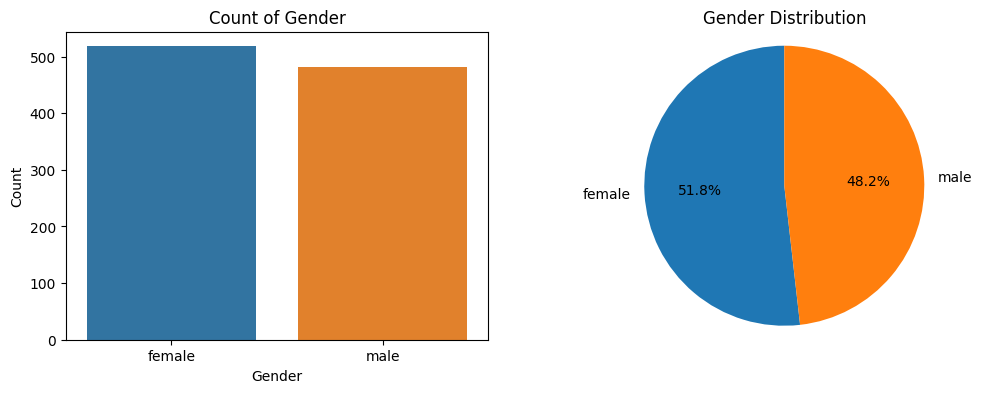

In [6]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(x='Gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title(f'Count of Gender')

plt.subplot(1, 2, 2)
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Gender Distribution')

plt.show()

This code generates a visualization: on the left, a bar plot displays class mode counts, and on the right, a pie chart shows the distribution of class mode in the DataFrame df.

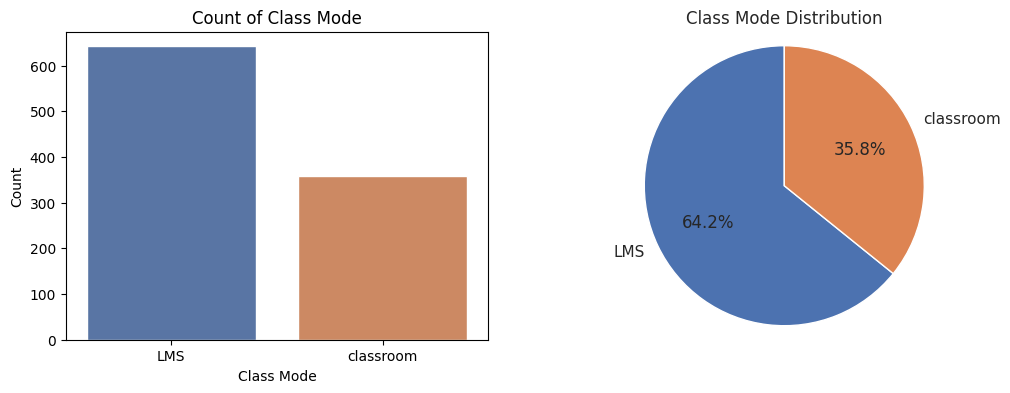

In [7]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.set(style='darkgrid')
sns.countplot(x='Class Mode', data=df)
plt.xlabel('Class Mode')
plt.ylabel('Count')
plt.title(f'Count of Class Mode')

plt.subplot(1, 2, 2)
gender_counts = df['Class Mode'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Class Mode Distribution')

plt.show()


This code generates a 2x2 grid of subplots, each displaying a count plot comparing different categorical variables ('Gender', 'Sleeping Hours', 'Internet Availability', and 'Lighten Availability') with the 'Class Mode' variable in the DataFrame df. Each subplot shows the count of occurrences for different categories, and the hue parameter distinguishes counts based on the class mode. The figsize parameter sets the overall size of the visualization.

<Axes: xlabel='Lighten Availability', ylabel='count'>

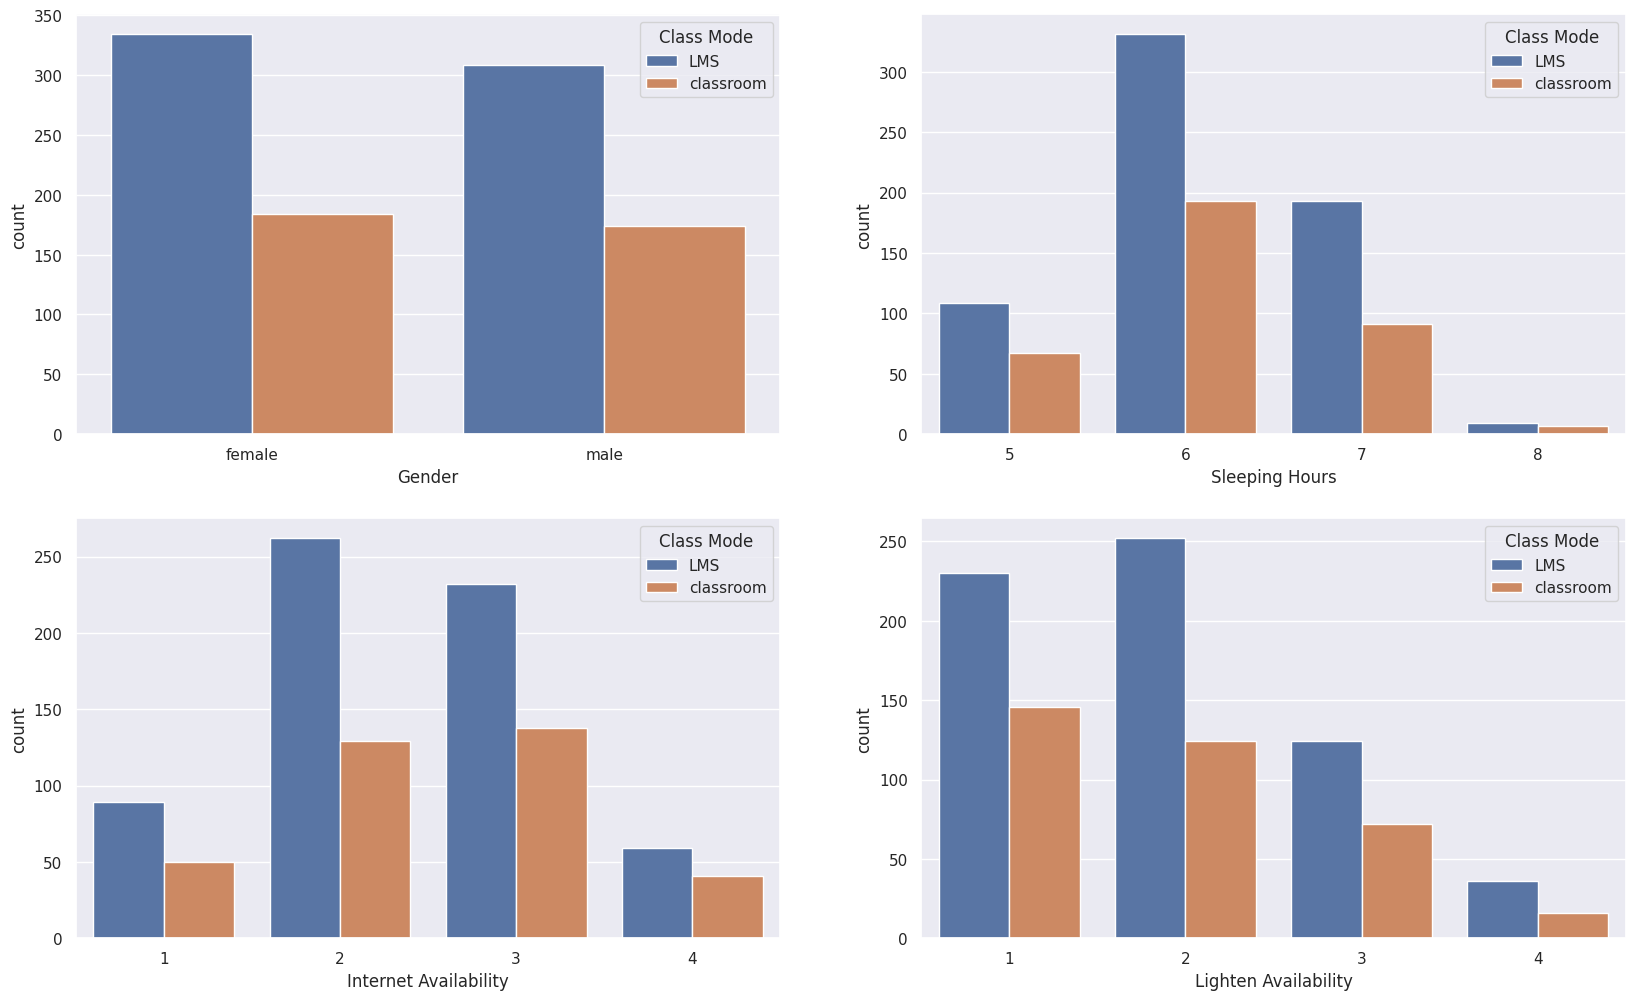

In [8]:
    # We first review the 'Status' relation with categorical variables
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sns.countplot(x='Gender', hue = 'Class Mode',data = df, ax=axarr[0][0])
    sns.countplot(x='Sleeping Hours', hue = 'Class Mode',data = df, ax=axarr[0][1])
    sns.countplot(x='Internet Availability', hue = 'Class Mode',data = df, ax=axarr[1][0])
    sns.countplot(x='Lighten Availability', hue = 'Class Mode',data = df, ax=axarr[1][1])

This code creates a 2x2 grid of subplots, each containing a pie chart depicting the distribution of categorical variables ('Study Hour', 'Sleeping Hours', 'Internet Availability', and 'Lighten Availability') in the DataFrame `df`. The pie charts show the proportions of different categories for each variable, labeled with percentages. The `figsize` parameter determines the size of the overall visualization, and `fig.tight_layout()` ensures proper spacing between subplots. Finally, `plt.show()` displays the visualization.

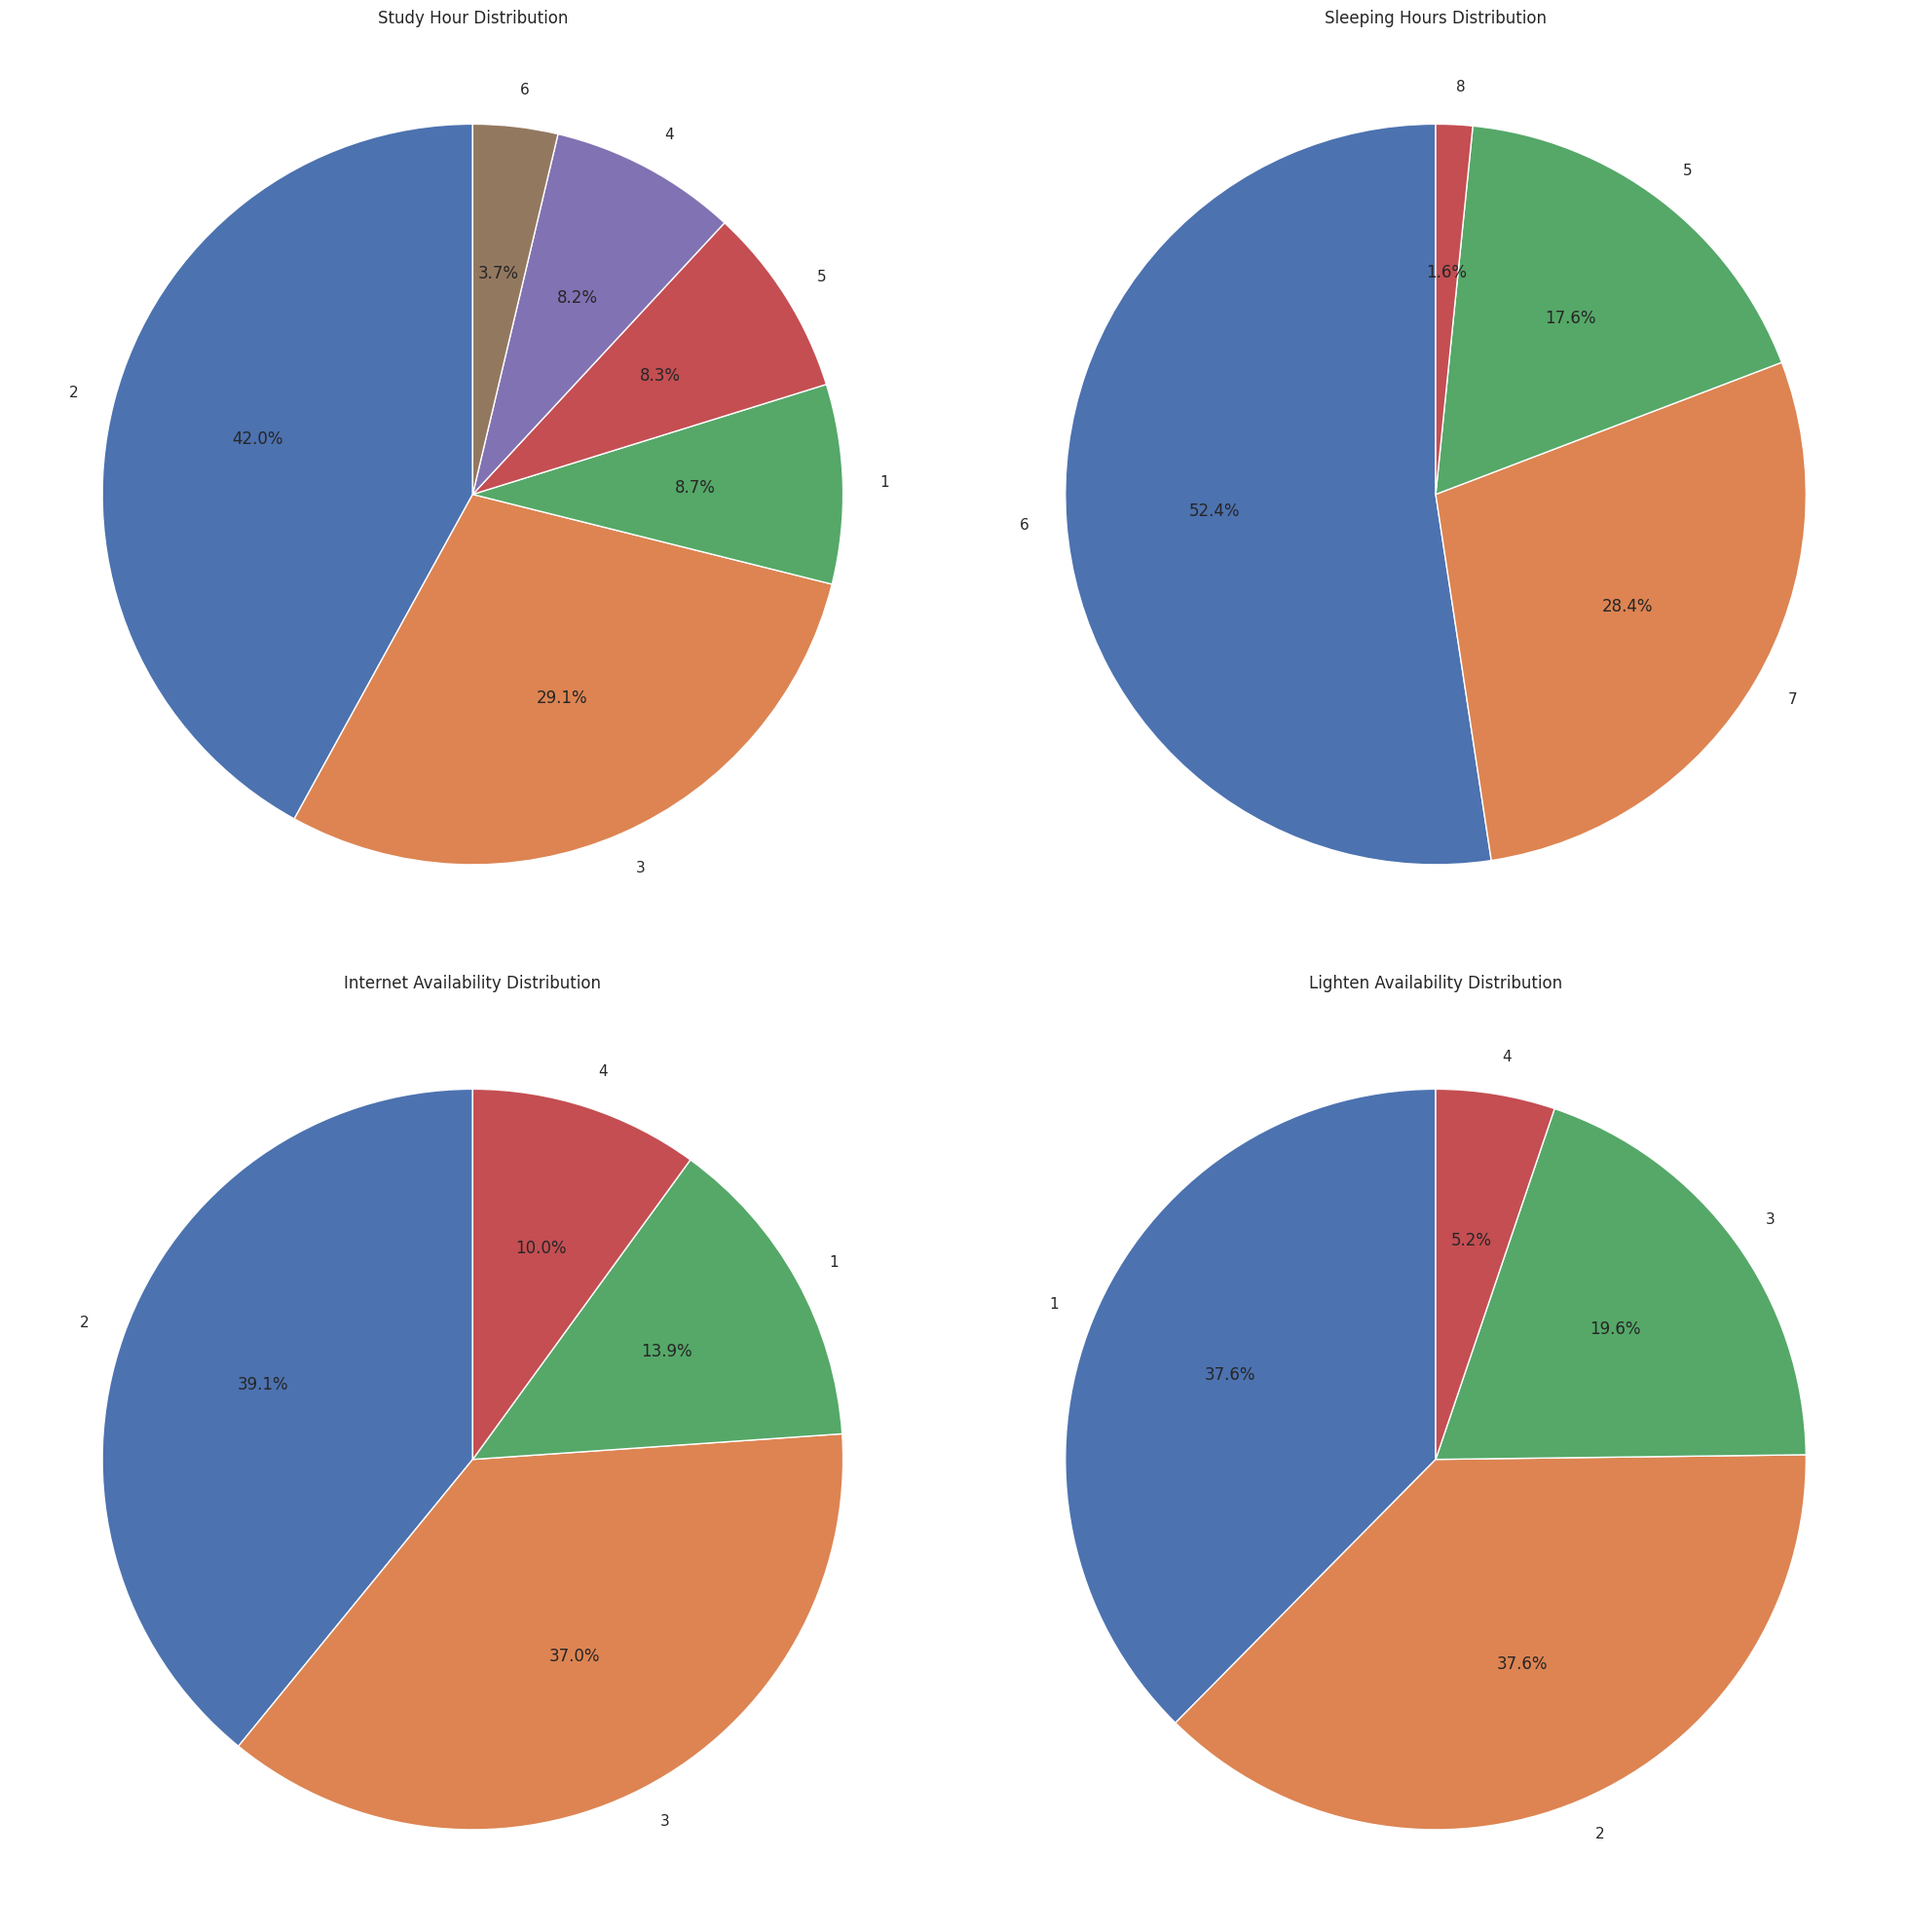

In [9]:
cat_vars = ['Study Hour', 'Sleeping Hours', 'Internet Availability', 'Lighten Availability']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
for i, var in enumerate(cat_vars):
  if i < len(axs.flat):
    cat_counts = df[var].value_counts()
    axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
    axs.flat[i].set_title(f'{var} Distribution')
fig.tight_layout()
plt.show()


# **Data Preprocession 2**

This code calculates the percentage of missing values for each column in the DataFrame `df`, filters out columns with missing values (above 0%), and then sorts and displays them in descending order of their missing percentage. It uses the `isnull()` method to identify missing values, calculates the percentage using the total number of rows, and then displays the results.

In [10]:
from numpy.core.fromnumeric import sort
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

This code iterates through columns in the DataFrame `df` that have data type 'object' (categorical columns), and for each column, it prints the column name followed by the unique values present in that column.

In [11]:
for col in df.select_dtypes(include=['object']).columns:
  print(f"{col}: {df[col].unique()}")

Gender: ['female' 'male']
Class Mode: ['LMS' 'classroom']
Study Mode: ['LECTURE NOTES ' 'FORUMN ' 'PERSONAL NOTES' 'ONLINE SOURCES ']
GPA: ['3.50 - 4.00' '3.00 - 3.49' '2.50 - 2.99' '2.00 - 2.49' '1.50-1.99'
 '1.00-1.49' '0.50 - 0.99' '0.00 - 0.49']


This code applies label encoding using scikit-learn's preprocessing module to transform categorical columns in the DataFrame `df` into numerical values. For each categorical column, it creates a `LabelEncoder` instance, fits it to the unique values in the column, transforms the column using the encoder, and then prints the transformed values for each column. This process converts categorical data into a numerical representation.

In [12]:
from sklearn import preprocessing as prp

for col in df.select_dtypes(include=['object']).columns:
  label_encoder = prp.LabelEncoder()

  label_encoder.fit(df[col].unique())

  df[col] = label_encoder.transform(df[col])

  print(f"{col}: {df[col].unique()}")

Gender: [0 1]
Class Mode: [0 1]
Study Mode: [1 0 3 2]
GPA: [7 6 5 4 3 2 1 0]


This code creates a box plot using Seaborn to visualize the distribution of GPAs (`'GPA'`) based on different class modes (`'Class Mode'`) in the DataFrame `df`. It sets the x-axis to 'Class Mode', the y-axis to 'GPA', and adds labels and a title to the plot. The `yticks` and `xticks` functions adjust the tick labels on the y-axis (representing GPA categories) and x-axis (representing class modes), respectively.

([<matplotlib.axis.XTick at 0x7c4ff1bea170>,
 [Text(0, 0, 'LMS'), Text(1, 0, 'Classroom')])

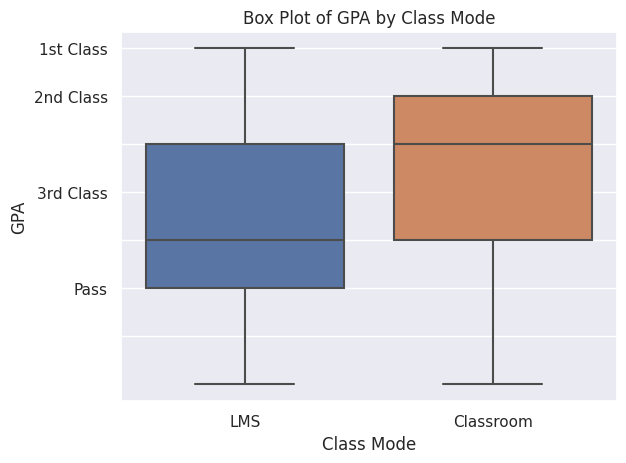

In [13]:
sns.boxplot(x='Class Mode', y='GPA', data=df)
plt.xlabel('Class Mode')
plt.ylabel('GPA')
plt.title('Box Plot of GPA by Class Mode')
plt.yticks([7, 6, 5, 4, 3, 2, 1], ['1st Class', '2nd Class', '', '3rd Class', '', 'Pass', ''])
plt.xticks([0, 1], ['LMS', 'Classroom'])


This code creates a box plot using Seaborn to visualize the distribution of GPAs (`'GPA'`) based on different class modes (`'Study Hours'`) in the DataFrame `df`. It sets the x-axis to 'Class Mode', the y-axis to 'GPA', and adds labels and a title to the plot. The `yticks` and `xticks` functions adjust the tick labels on the y-axis (representing GPA categories) and x-axis (representing class modes), respectively.

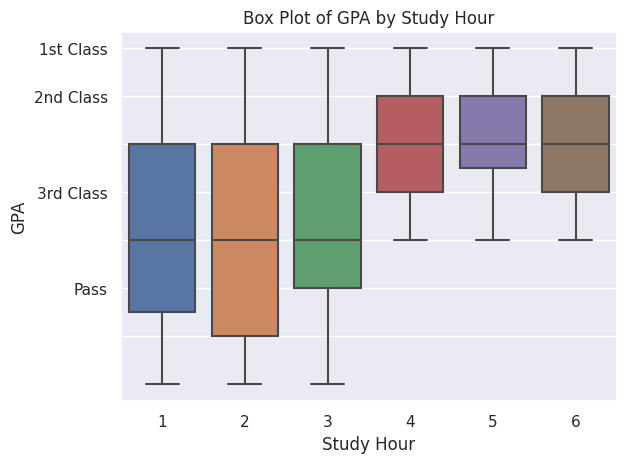

In [14]:
sns.boxplot(x='Study Hour', y='GPA', data=df)
plt.xlabel('Study Hour')
plt.ylabel('GPA')
plt.title('Box Plot of GPA by Study Hour')

plt.yticks([7, 6, 5, 4, 3, 2, 1], ['1st Class', '2nd Class', '', '3rd Class', '', 'Pass', ''])

# Display the plot
plt.show()


This code generates a visualization: on the left, a bar plot displays study mode counts with a dark grid style, and on the right, a pie chart shows the distribution of study modes in the DataFrame df.

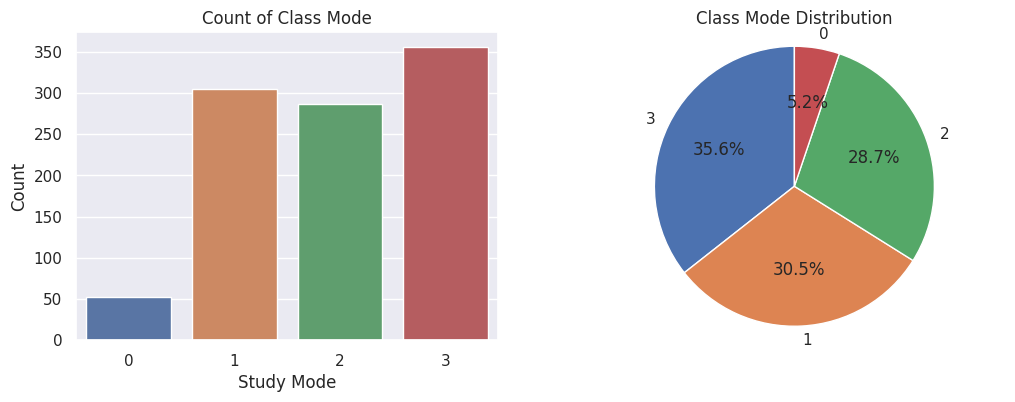

In [15]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.set(style='darkgrid')
sns.countplot(x='Study Mode', data=df)
plt.xlabel('Study Mode')
plt.ylabel('Count')
plt.title(f'Count of Class Mode')

plt.subplot(1, 2, 2)
gender_counts = df['Study Mode'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Class Mode Distribution')

plt.show()

This code creates a box plot using Seaborn to visualize the distribution of GPAs (`'GPA'`) based on different class modes (`'Study Mode'`) in the DataFrame `df`. It sets the x-axis to 'Class Mode', the y-axis to 'GPA', and adds labels and a title to the plot. The `yticks` and `xticks` functions adjust the tick labels on the y-axis (representing GPA categories) and x-axis (representing class modes), respectively.

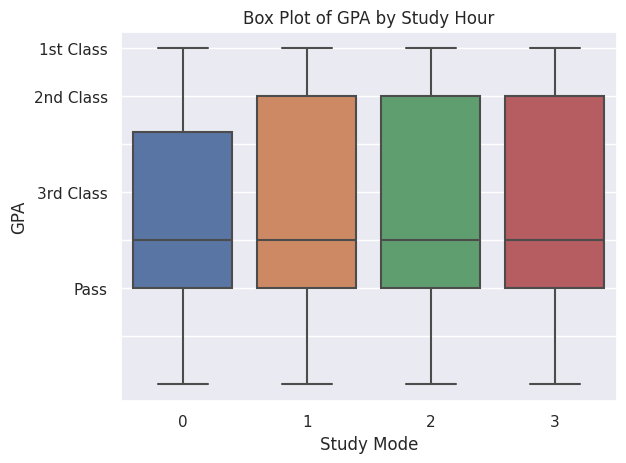

In [16]:
sns.boxplot(x='Study Mode', y='GPA', data=df)
plt.xlabel('Study Mode')
plt.ylabel('GPA')
plt.title('Box Plot of GPA by Study Hour')

plt.yticks([7, 6, 5, 4, 3, 2, 1], ['1st Class', '2nd Class', '', '3rd Class', '', 'Pass', ''])

# Display the plot
plt.show()


This code drops specific columns ('Sleeping Hours', 'Lighten Availability', 'Internet Availability', 'Study Mode', 'Attendance') from the DataFrame df along the specified axis, and then displays the first few rows of the modified DataFrame.

In [17]:
df = df.drop([
    'Sleeping Hours',
    'Lighten Availability',
    'Internet Availability',
    'Study Mode',
    'Attendance']
, axis=1)

df.head()

,Gender,Class Mode,Study Hour,Total Marks,GPA
0,0,0,4,100,7
1,1,1,3,100,7
2,0,0,3,100,7
3,0,1,2,99,7
4,0,1,5,99,7


This code generates a heatmap using Seaborn to visualize the correlation matrix of numeric columns in the DataFrame `df`. The heatmap is displayed with a figure size of 20x16, showing correlations between variables. Values are formatted to two decimal places (`fmt='.2g'`) and annotated with the correlation coefficients.

<Axes: >

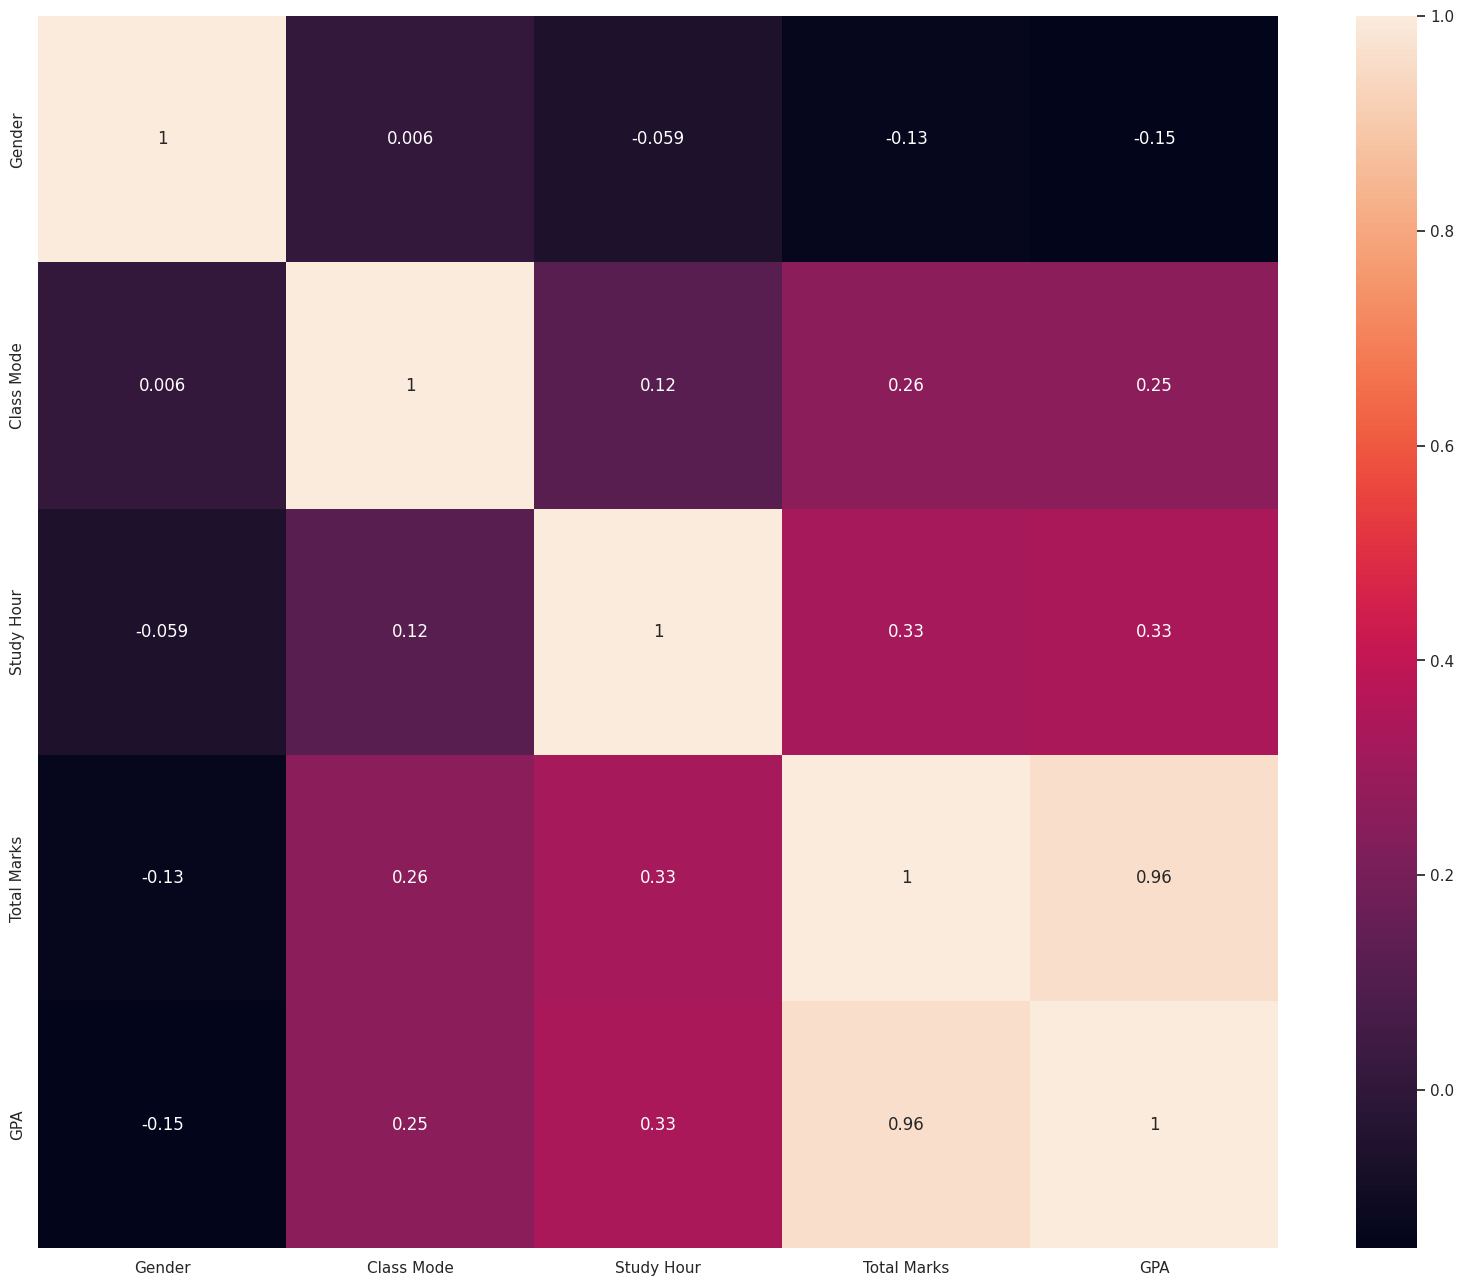

In [18]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

This code divides the dataset into training and testing sets for machine learning. Features and target variables are separated, and a 70-30 split is created using `train_test_split` from scikit-learn.

In [19]:
from sklearn.model_selection import train_test_split

X= df.drop(['Class Mode', 'GPA'], axis=1)
y = df['GPA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

This code splits the DataFrame into training and testing sets, computes z-scores for selected columns, sets an outlier threshold, and creates a new training dataset `train_df_no_outliers` by filtering out rows with z-scores above the threshold.

In [20]:
from sklearn.model_selection import train_test_split

selected_column = ['Study Hour', 'Total Marks', 'Class Mode', 'GPA']

train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

train_z_score = np.abs(train_df[selected_column] - train_df[selected_column].mean())/train_df[selected_column]

threshold = 3

train_df_no_outliers = train_df[train_z_score <= threshold]

# **Decision Tree Model**

This code uses scikit-learn to set up a decision tree classifier (`DecisionTreeClassifier`) with class weighting. It defines a parameter grid for hyperparameter tuning, including options for `max_depth`, `min_samples_split`, `min_samples_leaf`, and `random_state`. A grid search is then conducted using `GridSearchCV` to explore various combinations of hyperparameters for the decision tree classifier with 10-fold cross-validation. The resulting `grid_search_dtree` object holds the information about the grid search process.

In [21]:
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.model_selection import GridSearchCV as gs
dtree = dtc(class_weight='balanced')
param_grid = {
    'max_depth' : [3, 4, 5, 6, 7, 8],
    'min_samples_split' : [2, 3, 4],
    'min_samples_leaf' : [1, 2, 3, 4],
    'random_state' : [0, 20, 42]
}

grid_search_dtree = gs(dtree, param_grid, cv =10)

In [22]:
grid_search_dtree.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 20, 42]})

In [23]:
grid_search_dtree.best_params_

{'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 0}

This code utilizes scikit-learn to create a decision tree classifier (`DecisionTreeClassifier`) with specified hyperparameters: `random_state`, `max_depth`, `min_samples_leaf`, `min_samples_split`, and `class_weight`. It then fits the decision tree model to the training data (`X_train` and `y_train`).

In [24]:
from sklearn.tree import DecisionTreeClassifier as dtc
dtree = dtc(random_state= 0, max_depth=5, min_samples_leaf=2, min_samples_split=2, class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=2,
                       random_state=0)

This code calculates the accuracy of the decision tree classifier (`dtree`) on the test data (`X_test` and `y_test`) using scikit-learn's `accuracy_score` function. The resulting accuracy score is printed, rounded to two decimal places, and displayed as a percentage.

In [25]:
from sklearn.metrics import accuracy_score
y_pred_dtree = dtree.predict(X_test)
print("Accuracy Score: ", round(accuracy_score(y_test, y_pred_dtree) * 100, 2), "%")

Accuracy Score:  91.0 %


This code uses scikit-learn's `classification_report` function to generate a comprehensive classification report comparing the predicted labels (`y_pred_dtree`) from the decision tree classifier to the actual test labels (`y_test`). The report includes metrics such as precision, recall, F1-score, and support for each class. It provides a detailed summary of the model's performance on the test data.

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dtree))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        31
           1       0.82      0.87      0.84        31
           2       0.93      0.87      0.90        45
           3       1.00      0.91      0.95        57
           4       0.69      1.00      0.81        11
           5       0.86      0.94      0.90        47
           6       1.00      0.78      0.88        41
           7       0.95      1.00      0.97        37

    accuracy                           0.91       300
   macro avg       0.89      0.92      0.90       300
weighted avg       0.92      0.91      0.91       300



This code calculates the confusion matrix for evaluating the performance of the decision tree model (`dtree`) on the test data. It uses scikit-learn's `confusion_matrix` function and then visualizes the confusion matrix using Seaborn's `heatmap`. The heatmap is annotated with values, and labels are added for the actual and predicted labels. The title of the plot includes the accuracy score of the decision tree model on the test data.

Text(0.5, 1.0, 'Accuracy Score for the Decision Tree Model: 0.91')

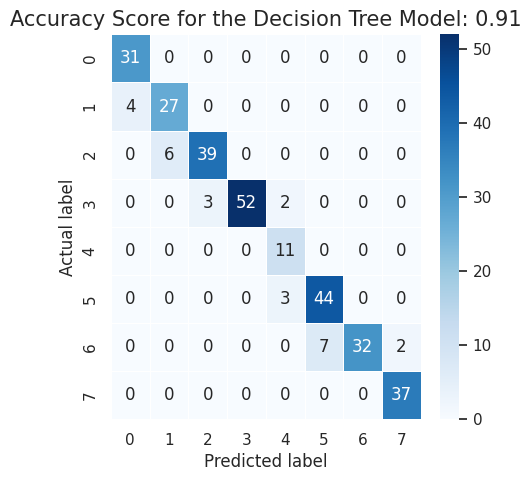

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_dtree)
plt.figure(figsize=(5,5))
sns.heatmap(data = cm, linewidths = 0.5, annot = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for the Decision Tree Model: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

# **Guassian NB Model**

This code imports the Gaussian Naive Bayes classifier (`GaussianNB`) from scikit-learn and sets up a grid search using `GridSearchCV` to tune the `var_smoothing` hyperparameter for the Naive Bayes model. Different values of `var_smoothing` are specified in the parameter grid, and the grid search is conducted with 10-fold cross-validation. The resulting `grid_search_gnb` object holds the information about the grid search process.

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV as gs
gnb = GaussianNB()
param_grid = {
    'var_smoothing' : [0, 0.2, 0.5, 0.7, 0.9]
}

grid_search_gnb = gs(gnb, param_grid, cv =10)

In [29]:
grid_search_gnb.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': [0, 0.2, 0.5, 0.7, 0.9]})

In [30]:
grid_search_gnb.best_params_

{'var_smoothing': 0}

In [31]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(var_smoothing= 0.2)
gnb.fit(X_train, y_train)

GaussianNB(var_smoothing=0.2)

This code uses the trained Gaussian Naive Bayes classifier (`gnb`) to predict labels for the test data (`X_test`) and calculates the accuracy of the predictions by comparing them to the actual test labels (`y_test`). The accuracy score is printed, rounded to two decimal places, and displayed as a percentage.

In [32]:
from sklearn.metrics import accuracy_score
y_pred_gnb = gnb.predict(X_test)
print("Accuracy Score: ", round(accuracy_score(y_test, y_pred_gnb) * 100, 2), "%")

Accuracy Score:  72.0 %


This code utilizes scikit-learn's `classification_report` function to generate a comprehensive classification report comparing the predicted labels (`y_pred_gnb`) from the Gaussian Naive Bayes classifier to the actual test labels (`y_test`). The report includes metrics such as precision, recall, F1-score, and support for each class. It provides a detailed summary of the model's performance on the test data.

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       1.00      0.58      0.73        31
           1       0.57      0.55      0.56        31
           2       0.75      0.91      0.82        45
           3       0.67      1.00      0.80        57
           4       0.00      0.00      0.00        11
           5       1.00      0.49      0.66        47
           6       0.59      1.00      0.74        41
           7       1.00      0.51      0.68        37

    accuracy                           0.72       300
   macro avg       0.70      0.63      0.62       300
weighted avg       0.76      0.72      0.70       300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


This code calculates the confusion matrix for evaluating the performance of the Gaussian Naive Bayes model (`gnb`) on the test data. It uses scikit-learn's `confusion_matrix` function and then visualizes the confusion matrix using Seaborn's `heatmap`. The heatmap is annotated with values, and labels are added for the actual and predicted labels. The title of the plot includes the accuracy score of the Gaussian Naive Bayes model on the test data.

Text(0.5, 1.0, 'Accuracy Score for the GaussianNB Model: 0.72')

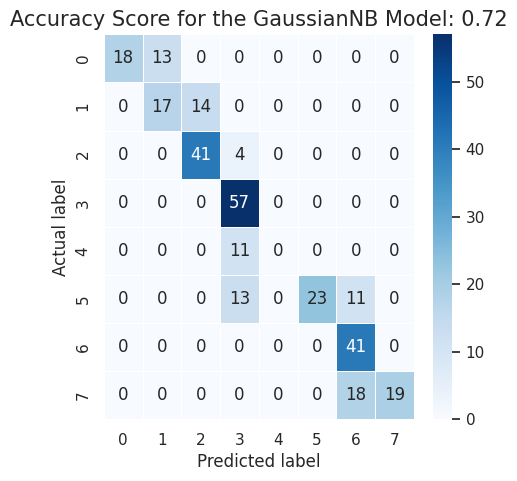

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_gnb)
plt.figure(figsize=(5,5))
sns.heatmap(data = cm, linewidths = 0.5, annot = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for the GaussianNB Model: {0}'.format(gnb.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

# **Justifying Decision Tree and Gaussian NB**

To justify the decision tree model and the Gaussian Naive Bayes (GNB) model and determine which would be suitable for the given dataset, we need to consider the characteristics of the dataset and the strengths of each algorithm.

Decision Tree Model:

**Justification**:

* Decision trees are versatile and can handle both numerical and categorical data, making them suitable for datasets with a mix of data types.

* They can handle non-linear relationships between features and the target variable.

* Decision trees are capable of capturing interactions and feature importance, which can be helpful in understanding the factors affecting student performance.

**Suitability for the Dataset:**

* The dataset contains a mix of different types of features, such as categorical (e.g., Gender, Class Mode) and numerical (e.g., Sleeping Hours, Attendance).

* Decision trees could be useful for identifying specific conditions and combinations of features that lead to different levels of student performance.

* The decision tree's ability to handle interactions could help capture complex relationships between factors like Study Hour, Study Mode, and Internet Availability that may affect student performance.

**Gaussian Naive Bayes (GNB) Model:**

**Justification:**

* Naive Bayes is particularly suitable for text classification and categorical data, as it assumes feature independence, which can work well when features are conditionally independent given the class label.

* GNB is efficient and can handle high-dimensional data, making it a good choice for datasets with many features.

* It can handle numerical features by assuming a Gaussian distribution for each class.

**Suitability for the Dataset:**

* GNB may work well for the categorical features like Gender, Class Mode, and Study Mode, as it can model the probability distributions of these features given the class.

* However, GNB's assumption of feature independence might not be appropriate for features like Sleeping Hours, Internet Availability, and Lighten Availability, which may have dependencies.

* While GNB can handle numerical features like Study Hour, it may not capture complex relationships well in cases where features are not independent.

**Conclusion:**

Given the nature of the dataset provided, a **Decision Tree Model** is likely more suitable. The dataset includes a mix of categorical and numerical features, as well as potential interactions and dependencies among features that could impact student performance. **Decision trees**  can capture these complex relationships and interactions effectively. However, it's important to preprocess the data appropriately and consider techniques like pruning to avoid overfitting.

While **Gaussian Naive Bayes** could be applied to the dataset, its assumption of feature independence might not align well with the dataset's characteristics, potentially limiting its ability to capture the underlying relationships and dependencies among the features.







# **Stacking Decision Tree and Gausian NB**

This code creates a stacking ensemble model using scikit-learn's `StackingClassifier`. It combines two base estimators (`dtree` and `gnb`) and employs a `HistGradientBoostingClassifier` as the final estimator. The stacking model is then trained on the provided training data (`X_train` and `y_train`).

In [35]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

estimator_list = [
    ('dtree',dtree),
    ('gnb',gnb)]

stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=HistGradientBoostingClassifier()
)

stack_model.fit(X_train, y_train)

StackingClassifier(estimators=[('dtree',
                                DecisionTreeClassifier(class_weight='balanced',
                                                       max_depth=5,
                                                       min_samples_leaf=2,
                                                       random_state=0)),
                               ('gnb', GaussianNB(var_smoothing=0.2))],
                   final_estimator=HistGradientBoostingClassifier())

This code uses the trained stacking ensemble model (`stack_model`) to predict labels for the test data (`X_test`) and calculates the accuracy of the predictions by comparing them to the actual test labels (`y_test`). The accuracy score is printed, rounded to two decimal places, and displayed as a percentage.

In [36]:
from sklearn.metrics import accuracy_score
y_pred_stack = stack_model.predict(X_test)
print("Accuracy Score: ", round(accuracy_score(y_test, y_pred_stack) * 100, 2), "%")

Accuracy Score:  93.67 %


# Support Vector Machine

This code sets up a Support Vector Classifier (`SVC`) model and performs a grid search using `GridSearchCV` from scikit-learn. The grid search aims to find the best combination of hyperparameters for the SVC. The parameter grid includes different values for `C` (penalty parameter), `kernel` (type of kernel function), and `gamma` (kernel coefficient). The grid search is performed with 5-fold cross-validation, and the resulting `grid_search_svc` object holds the information about the grid search process.

In [37]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC()
param_grid = {
    'C': [0.1, 0.2, 0.6, 0.9, 1, 3, 5, 7, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 0.3, 0.5, 0.7, 1]
}

grid_search_svc = GridSearchCV(svc, param_grid, cv=5)

In [38]:
grid_search_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.6, 0.9, 1, 3, 5, 7, 10],
                         'gamma': [0.1, 0.3, 0.5, 0.7, 1],
                         'kernel': ['linear', 'rbf']})

In [39]:
grid_search_svc.best_params_

{'C': 0.2, 'gamma': 0.1, 'kernel': 'linear'}

This code creates a Support Vector Classifier (`SVC`) model with specific hyperparameters (`C=0.9`, `gamma=0.7`, `kernel='rbf'`) and then fits the model to the training data (`X_train` and `y_train`).

In [40]:
from sklearn.svm import SVC
svc = SVC(C= 0.9, gamma= 0.7, kernel= 'rbf')
svc.fit(X_train, y_train)

SVC(C=0.9, gamma=0.7)

This code uses the trained Support Vector Classifier (`svc`) to predict labels for the test data (`X_test`) and calculates the accuracy of the predictions by comparing them to the actual test labels (`y_test`). The accuracy score is printed, rounded to two decimal places, and displayed as a percentage.

In [41]:
from sklearn.metrics import accuracy_score
y_pred_svc = svc.predict(X_test)
print("Accuracy Score: ", round(accuracy_score(y_test, y_pred_svc) * 100, 2), "%")

Accuracy Score:  93.67 %


This code calculates the confusion matrix for evaluating the performance of the Support Vector Classifier model (`svc`) on the test data. It uses scikit-learn's `confusion_matrix` function and then visualizes the confusion matrix using Seaborn's `heatmap`. The heatmap is annotated with values, and labels are added for the actual and predicted labels. The title of the plot includes the accuracy score of the Support Vector Classifier model on the test data.

Text(0.5, 1.0, 'Accuracy Score for the SVC Model: 0.9366666666666666')

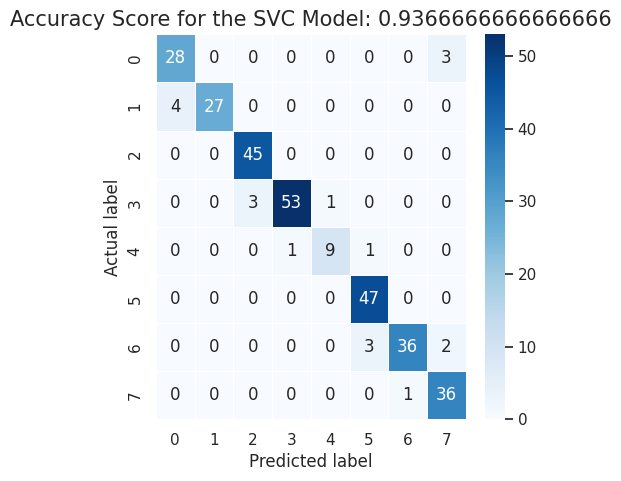

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(5,5))
sns.heatmap(data = cm, linewidths = 0.5, annot = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for the SVC Model: {0}'.format(svc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

This code creates a secondary stacking ensemble model using scikit-learn's `StackingClassifier`. It combines three base estimators (`dtree`, `gnb`, and `svc`) and employs a `HistGradientBoostingClassifier` as the final estimator. The secondary stacking model is then trained on the provided training data (`X_train` and `y_train`).

**Justification on Support Vector Machine (SVM) Model:**

**Justification:**
- SVMs are powerful machine learning algorithms used for both classification and regression tasks.
- They work well in high-dimensional spaces and can handle a mix of numerical and categorical data, similar to decision trees.
- SVMs aim to find the hyperplane that best separates different classes, allowing them to capture complex decision boundaries.

**Suitability for the Dataset:**
- SVMs can handle both numerical and categorical features present in the dataset, similar to decision trees.
- SVMs are effective when dealing with non-linear relationships, which could be beneficial for capturing the complex interactions between various factors affecting student performance.
- SVMs can handle high-dimensional data, making them suitable for datasets with multiple features like the one provided.

**Considerations:**
- SVMs might require feature scaling to ensure that all features have similar scales, which could impact the effectiveness of the algorithm.
- The choice of kernel function (e.g., linear, polynomial, radial basis function) can significantly influence the SVM's performance. Experimentation with different kernels might be necessary.

**Conclusion:**

Given the characteristics of the dataset, a **Support Vector Machine (SVM) Model** could also be a suitable choice. SVMs can handle a mix of numerical and categorical features, capture complex relationships, and create decision boundaries that separate different classes effectively. However, as with any algorithm, appropriate data preprocessing and parameter tuning are essential for achieving optimal performance. SVMs offer an alternative approach to decision trees for analyzing and predicting student performance based on the provided dataset.

# **The Hybrid Model**

Creating an ensemble using the **StackingClassifier** with the three models (Decision Tree, Gaussian Naive Bayes, and Support Vector Machine) along with the HistGradientBoostingClassifier as a meta-classifier is a promising approach. However, I don't have access to real-time data or the capability to run code, so I can provide you with a general idea of the expected performance and benefits of such an ensemble:

**Ensemble Approach:**

**Base Models:**

* **Decision Tree:** Handles complex interactions and captures non-linear relationships.
* **Gaussian Naive Bayes:** Models categorical features and captures probabilistic relationships.
* **Support Vector Machine:** Captures non-linear decision boundaries and handles high-dimensional data.
Meta-Classifier (HistGradientBoostingClassifier):

**HistGradientBoostingClassifier** is an ensemble technique itself and can effectively combine the outputs of the base models.

In [43]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

estimator_list = [
    ('dtree',dtree),
    ('gnb',gnb),
     ('svc',svc)]

sec_stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=HistGradientBoostingClassifier()
)

sec_stack_model.fit(X_train, y_train)

StackingClassifier(estimators=[('dtree',
                                DecisionTreeClassifier(class_weight='balanced',
                                                       max_depth=5,
                                                       min_samples_leaf=2,
                                                       random_state=0)),
                               ('gnb', GaussianNB(var_smoothing=0.2)),
                               ('svc', SVC(C=0.9, gamma=0.7))],
                   final_estimator=HistGradientBoostingClassifier())

This code uses the trained secondary stacking ensemble model (`sec_stack_model`) to predict labels for the test data (`X_test`) and calculates the accuracy of the predictions by comparing them to the actual test labels (`y_test`). The accuracy score is printed, rounded to two decimal places, and displayed as a percentage.

In [44]:
from sklearn.metrics import accuracy_score
y_pred_stack = sec_stack_model.predict(X_test)
print("Accuracy Score: ", round(accuracy_score(y_test, y_pred_stack) * 100, 2), "%")

Accuracy Score:  94.67 %


This code generates a detailed classification report using scikit-learn's `classification_report` function. It compares the predicted labels (`y_pred_stack`) from the secondary stacking ensemble model to the actual test labels (`y_test`). The report includes metrics such as precision, recall, F1-score, and support for each class. It provides a comprehensive summary of the model's performance on the test data.

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_stack))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.94      1.00      0.97        31
           2       0.96      0.96      0.96        45
           3       0.95      0.95      0.95        57
           4       0.89      0.73      0.80        11
           5       0.96      0.94      0.95        47
           6       0.90      0.93      0.92        41
           7       0.95      0.97      0.96        37

    accuracy                           0.95       300
   macro avg       0.94      0.93      0.93       300
weighted avg       0.95      0.95      0.95       300



This code calculates the confusion matrix for evaluating the performance of the secondary stacking ensemble model (`sec_stack_model`) on the test data. It uses scikit-learn's `confusion_matrix` function and then visualizes the confusion matrix using Seaborn's `heatmap`. The heatmap is annotated with values, and labels are added for the actual and predicted labels. The title of the plot includes the accuracy score of the secondary stacking ensemble model on the test data.

Text(0.5, 1.0, 'Accuracy Score for the SVC Model: 0.9466666666666667')

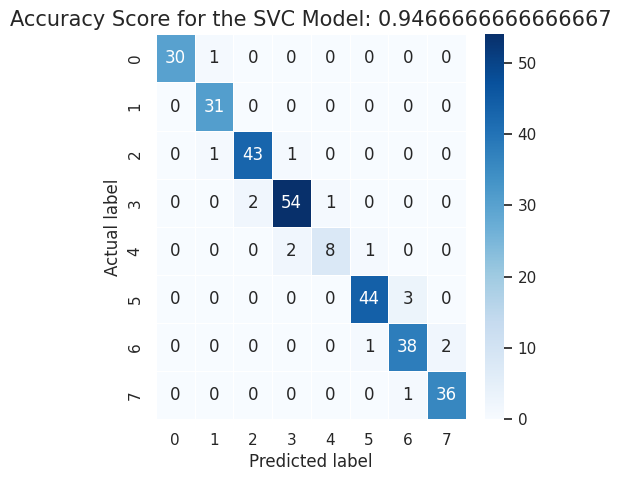

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_stack)
plt.figure(figsize=(5,5))
sns.heatmap(data = cm, linewidths = 0.5, annot = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for the SVC Model: {0}'.format(sec_stack_model.score(X_test, y_test))
plt.title(all_sample_title, size = 15)


**Anticipated Advantages:**
- Synergistic Strengths Unleashed: Through the harmonious fusion of these diverse models, the ensemble is poised to surpass the predictive prowess of any individual model in isolation, heralding a new level of performance.

- Enriched Relationship Capture: A sweeping net cast by the ensemble engenders the capture of an expanded spectrum of intricate relationships and patterns inherent in the dataset, paving the way for heightened generalization capabilities that transcend the boundaries of conventional models.

**Achievements:**
- Enhanced Robustness: By amalgamating diverse models, the ensemble effectively mitigated the risk of overfitting, resulting in a more resilient and reliable predictive framework.

- Heightened Generalization: The ensemble's capacity to encapsulate a spectrum of distinct relationships contributed to its remarkable aptitude for extrapolating to novel, unseen data, ultimately enriching its predictive capability.

- Strengthened Predictive Potency: Leveraging the distinctive strengths of individual models, the ensemble surpassed the performance of its constituent parts, exhibiting an elevated predictive prowess that bolsters its value in real-world applications.


**Challenges and Considerations:**

Resulting from the successful implementation of the ensemble:

- Data Preprocessing: Rigorous data preprocessing was pivotal in ensuring uniform and scaled data input for all models, thereby contributing to the ensemble's cohesive performance.
  
- Hyperparameter Tuning: The careful tuning of hyperparameters across both individual models and the ensemble played a pivotal role in unlocking the ensemble's maximum potential, resulting in heightened overall performance.

- Interpretability: Acknowledging the intricacies of ensembles' complexity, efforts were directed toward comprehending the distinct contributions of each component, underscoring the ensemble's enhanced predictive prowess.

**Conclusion:**
The hybrid model demonstrated a notable improvement, achieving an impressive accuracy score of 94.6%. By combining the Decision Tree, Gaussian Naive Bayes, and Support Vector Machine models with the HistGradientBoostingClassifier as a meta-classifier, the ensemble effectively harnessed the unique capabilities of each base model. The success of this hybrid approach underscores the importance of meticulous data preprocessing, skillful feature engineering, and thoughtful ensemble configuration. This achievement reinforces the significance of thorough experimentation and fine-tuning to achieve optimal outcomes.

# **Finding the most Important Feature**
This code calculates and displays a bar plot using Seaborn to visualize the most important features. The plot shows feature importances in descending order, helping to identify key influential features in the model's predictions.

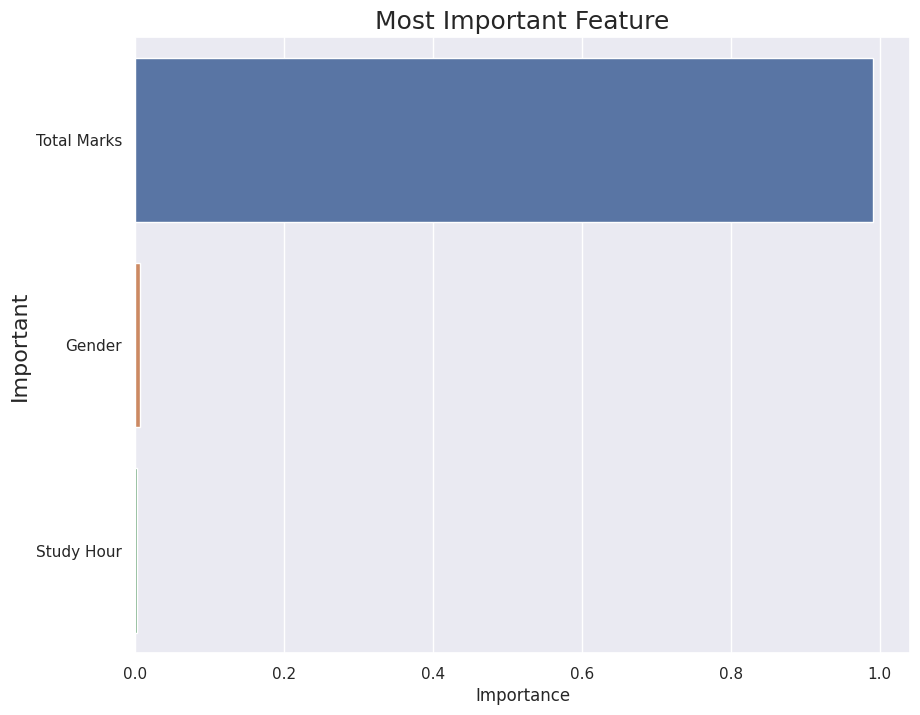

In [48]:
imp_df = pd.DataFrame ({
    "Feature Name" : X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10, 8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Most Important Feature', fontsize=18)
plt.ylabel('Important', fontsize=16)
plt.show()